In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Perceptrons (퍼셉트론)

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


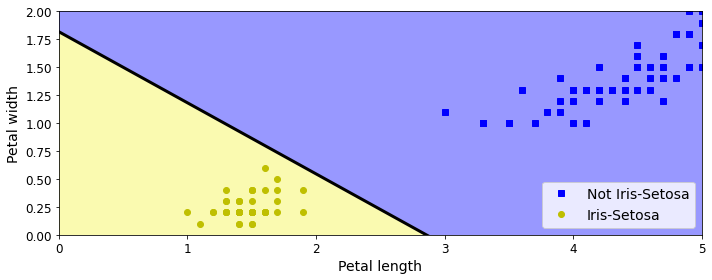

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions (활성화 함수)

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


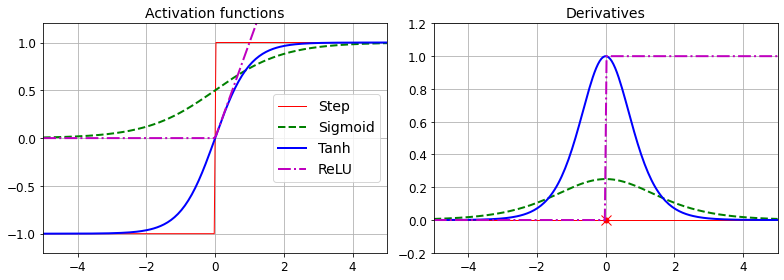

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

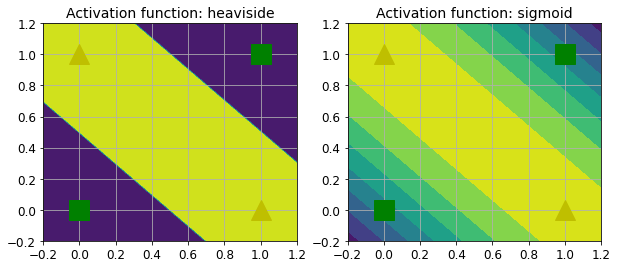

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.7.0'

In [11]:
keras.__version__

'2.7.0'

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [13]:
X_train_full.shape

(60000, 28, 28)

In [14]:
X_train_full.dtype

dtype('uint8')

In [15]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

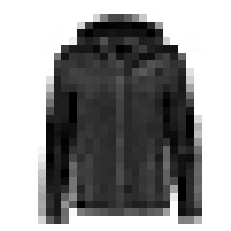

In [16]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [17]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [19]:
class_names[y_train[0]]

'Coat'

Saving figure fashion_mnist_plot


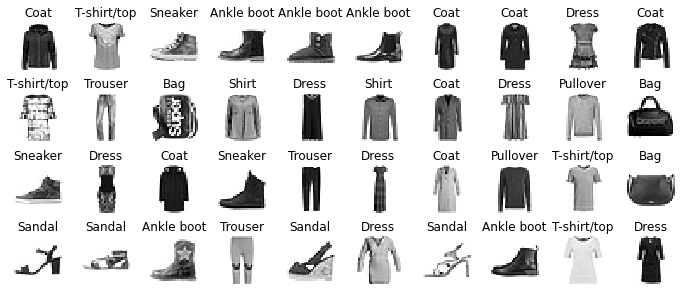

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [22]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.layers

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [27]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [28]:
model.get_layer(hidden1.name) is hidden1

True

In [29]:
weights, biases = hidden1.get_weights()

In [30]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [31]:
weights.shape

(784, 300)

In [32]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
biases.shape

(300,)

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [39]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4007 - accuracy: 0.8597 - val_loss: 0.3940 - val_accuracy: 0.8604
Epoch 2/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3833 - accuracy: 0.8649 - val_loss: 0.3676 - val_accuracy: 0.8714
Epoch 3/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3685 - accuracy: 0.8698 - val_loss: 0.4443 - val_accuracy: 0.8348
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3567 - accuracy: 0.8733 - val_loss: 0.3531 - val_accuracy: 0.8776
Epoch 5/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3471 - accuracy: 0.8771 - val_loss: 0.3441 - val_accuracy: 0.8740


In [40]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


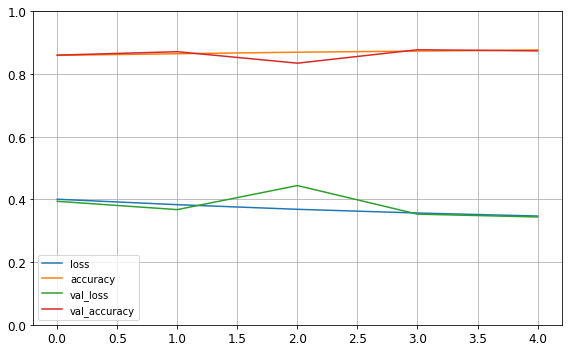

In [42]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3823 - accuracy: 0.8621


[0.38232675194740295, 0.8621000051498413]

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.14, 0.01, 0.69],
       [0.  , 0.  , 0.98, 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [46]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [48]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


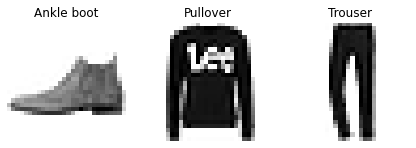

In [49]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP : MLP 신경망 (Multi-Layer Perceptron)

In [50]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/5
363/363 [==============================] - 3s 4ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/5
363/363 [==============================] - 2s 4ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.5527


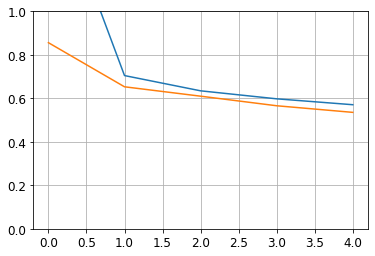

In [53]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [54]:
y_pred

array([[0.484385 ],
       [1.1512427],
       [2.7646856]], dtype=float32)

# Functional API

In [55]:
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [57]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [58]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/5
363/363 [==============================] - 2s 5ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.5215


In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [62]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=5,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/5
363/363 [==============================] - 2s 4ms/step - loss: 0.4465 - val_loss: 0.4115
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4424 - val_loss: 0.4136
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4395 - val_loss: 0.4072
Epoch 4/5
363/363 [==============================] - 2s 4ms/step - loss: 0.4346 - val_loss: 0.4171
Epoch 5/5
162/162 [==============================] - 1s 4ms/step - loss: 0.4299


In [63]:
np.random.seed(42)
tf.random.set_seed(42)

In [64]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [65]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [66]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=5,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/5
363/363 [==============================] - 6s 14ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/5
363/363 [==============================] - 2s 5ms/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - val_loss: 1.

In [67]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 3ms/step - loss: 0.6114 - main_output_loss: 0.5225 - aux_output_loss: 1.4113


# The subclassing API

In [68]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [69]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=5,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/5
363/363 [==============================] - 4s 6ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/5
363/363 [==============================] - 2s 4ms/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/5
162/162 [==============================] - 0s 3ms/step - loss: 0.6898 - output_1_loss: 0.6124 - output_2_loss: 1.3858


# Saving and Restoring : 모델 저장 및 복구

In [70]:
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [72]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/5
363/363 [==============================] - 2s 5ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.5059


In [73]:
model.save("my_keras_model.h5")
model = keras.models.load_model("my_keras_model.h5")
model.predict(X_new)

array([[0.71100795],
       [1.4392304 ],
       [2.6322746 ]], dtype=float32)

In [74]:
model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training : 콜 백

In [76]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [77]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [78]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/5
363/363 [==============================] - 3s 5ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/5
162/162 [==============================] - 1s 3ms/step - loss: 0.5059


In [79]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/5
363/363 [==============================] - 3s 5ms/step - loss: 0.5038 - val_loss: 0.4706
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4846 - val_loss: 0.5219
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4711 - val_loss: 0.4495
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4578 - val_loss: 0.4288
Epoch 5/5
162/162 [==============================] - 0s 2ms/step - loss: 0.4384


In [80]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [81]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

362/363 [============================>.] - ETA: 0s - loss: 0.4387
val/train: 0.94
363/363 [==============================] - 1s 4ms/step - loss: 0.4390 - val_loss: 0.4113


# TensorBoard

In [82]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [83]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_01_10-19_58_23'

In [84]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [85]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [86]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/5
363/363 [==============================] - 2s 4ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/5
363/363 [==============================] - 2s 5ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5272 - val_loss: 0.4895


In [87]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [88]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_01_10-19_59_35'

In [89]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [90]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [91]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/5
363/363 [==============================] - 3s 6ms/step - loss: 0.5530 - val_loss: 302.8466
Epoch 2/5
363/363 [==============================] - 2s 4ms/step - loss: 63.6669 - val_loss: 0.9735
Epoch 3/5
363/363 [==============================] - 2s 4ms/step - loss: 0.9411 - val_loss: 0.9599
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 0.9197 - val_loss: 0.8464
Epoch 5/5
363/363 [==============================] - 1s 4ms/step - loss: 0.9819 - val_loss: 0.9281


In [92]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning : 하이퍼 파라미터 조정

In [94]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [95]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [96]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-96-651c14c6d32f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [97]:
keras_reg.fit(X_train, y_train, epochs=5,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/5
363/363 [==============================] - 3s 5ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/5
363/363 [==============================] - 1s 3ms/step - loss: 0.4503 - val_loss: 0.4188


In [98]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 3ms/step - loss: 0.4343


In [99]:
y_pred = keras_reg.predict(X_new)

In [100]:
np.random.seed(42)
tf.random.set_seed(42)

In [101]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=5,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=4, n_hidden=1, learning_rate=0.022174573948353458 .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/5
242/242 [==============================] - 2s 6ms/step - loss: 0.8420 - val_loss: 0.4703
Epoch 2/5
242/242 [==============================] - 1s 5ms/step - loss: 0.4815 - val_loss: 0.4247
Epoch 3/5
242/242 [==============================] - 1s 5ms/step - loss: 0.4519 - val_loss: 0.4052
Epoch 4/5
242/242 [==============================] - 1s 4ms/step - loss: 0.4429 - val_loss: 0.3975
Epoch 5/5
121/121 [==============================] - 0s 3ms/step - loss: 0.4402
[CV]  n_neurons=4, n_hidden=1, learning_rate=0.022174573948353458, total=   7.2s
[CV] n_neurons=4, n_hidden=1, learning_rate=0.022174573948353458 .....
Epoch 1/5


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


242/242 [==============================] - 2s 4ms/step - loss: 0.7452 - val_loss: 0.4860
Epoch 2/5
242/242 [==============================] - 1s 4ms/step - loss: 0.4649 - val_loss: 0.4280
Epoch 3/5
242/242 [==============================] - 1s 4ms/step - loss: 0.4495 - val_loss: 0.5791
Epoch 4/5
242/242 [==============================] - 1s 4ms/step - loss: 0.4438 - val_loss: 0.4549
Epoch 5/5
121/121 [==============================] - 1s 4ms/step - loss: 0.4555A: 0s - loss: 0.455
[CV]  n_neurons=4, n_hidden=1, learning_rate=0.022174573948353458, total=   6.6s
[CV] n_neurons=4, n_hidden=1, learning_rate=0.022174573948353458 .....
Epoch 1/5
242/242 [==============================] - 3s 5ms/step - loss: 10.8725 - val_loss: 4.2468
Epoch 2/5
242/242 [==============================] - 1s 4ms/step - loss: 1.0257 - val_loss: 0.5794
Epoch 3/5
242/242 [==============================] - 1s 5ms/step - loss: 0.5263 - val_loss: 0.4357
Epoch 4/5
242/242 [==============================] - 1s 6ms/step 

242/242 [==============================] - 1s 5ms/step - loss: 6.2333 - val_loss: 3736.4512
Epoch 4/5
242/242 [==============================] - 1s 4ms/step - loss: 11.9933 - val_loss: 12227.6934
Epoch 5/5
121/121 [==============================] - 0s 3ms/step - loss: 166.3223
[CV]  n_neurons=40, n_hidden=0, learning_rate=0.01824796188192035, total=   6.4s
[CV] n_neurons=40, n_hidden=0, learning_rate=0.01824796188192035 .....
Epoch 1/5
242/242 [==============================] - 2s 5ms/step - loss: 1.0446 - val_loss: 15.8284
Epoch 2/5
242/242 [==============================] - 1s 5ms/step - loss: 0.5210 - val_loss: 22.4892
Epoch 3/5
242/242 [==============================] - 1s 4ms/step - loss: 0.5063 - val_loss: 24.7894
Epoch 4/5
242/242 [==============================] - 1s 3ms/step - loss: 0.5101 - val_loss: 22.4864
Epoch 5/5
121/121 [==============================] - 0s 3ms/step - loss: 1.0265
[CV]  n_neurons=40, n_hidden=0, learning_rate=0.01824796188192035, total=   6.7s
[CV] n_ne

121/121 [==============================] - 0s 3ms/step - loss: 0.3883
[CV]  n_neurons=74, n_hidden=3, learning_rate=0.005803602934201024, total=   7.4s
[CV] n_neurons=80, n_hidden=3, learning_rate=0.0059640580092043885 ...
Epoch 1/5
242/242 [==============================] - 2s 7ms/step - loss: 0.9615 - val_loss: 10.9251
Epoch 2/5
242/242 [==============================] - 1s 4ms/step - loss: 0.5921 - val_loss: 3.3912
Epoch 3/5
242/242 [==============================] - 1s 4ms/step - loss: 0.4539 - val_loss: 0.4039
Epoch 4/5
242/242 [==============================] - 1s 4ms/step - loss: 0.3914 - val_loss: 0.3693
Epoch 5/5
121/121 [==============================] - 0s 3ms/step - loss: 0.3809
[CV]  n_neurons=80, n_hidden=3, learning_rate=0.0059640580092043885, total=   7.0s
[CV] n_neurons=80, n_hidden=3, learning_rate=0.0059640580092043885 ...
Epoch 1/5
242/242 [==============================] - 2s 5ms/step - loss: 0.8381 - val_loss: 0.6551
Epoch 2/5
242/242 [============================

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.8min finished


Epoch 1/5
363/363 [==============================] - 3s 4ms/step - loss: 0.8571 - val_loss: 6.5088
Epoch 2/5
363/363 [==============================] - 2s 5ms/step - loss: 0.5640 - val_loss: 7.3062
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 0.4741 - val_loss: 0.5231
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 0.3858 - val_loss: 0.4529
Epoch 5/5
363/363 [==============================] - 2s 5ms/step - loss: 0.3723 - val_loss: 0.3947


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000017DD4E46760>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112...
                                                          0.00502142573

In [102]:
rnd_search_cv.best_params_

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}

In [103]:
rnd_search_cv.best_score_

-0.381504625082016

In [104]:
rnd_search_cv.best_estimator_

In [105]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3618


-0.3617786169052124

In [106]:
model = rnd_search_cv.best_estimator_.model
model

In [107]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 4ms/step - loss: 0.3618A: 0s - loss: 


0.3617786169052124